In [ ]:
# import sys, subprocess
# subprocess.check_call([sys.executable, "-m", "pip", "uninstall", "-y", "xgboost", "scikit-learn", "numpy"])
# subprocess.check_call([sys.executable, "-m", "pip", "install", "--no-cache-dir", "xgboost==1.7.6", "scikit-learn==1.3.2", "numpy==1.26.4"])

In [ ]:
import xgboost as xgb, sklearn, numpy as np
print(xgb.__version__, sklearn.__version__, np.__version__)

1.7.6 1.3.2 1.26.4


**FraudX - Group 8**
Credit Card Fraud Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import (
    average_precision_score, roc_auc_score, f1_score,
    precision_score, recall_score, confusion_matrix,
    precision_recall_curve, roc_curve
)

 **1. Data Preprocessing**

**1.1 Data Loading**

In [ ]:
data_creditcard = pd.read_csv("creditcard_2023.csv")

**1.2 Explor Datasets**

In [ ]:
# Display the shape of the dataset (rows, columns)
data_creditcard.shape

(568630, 31)

In [ ]:
# Display the column names of the dataset
data_creditcard.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Display a concise summary of the DataFrame
data_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
# Display the first 5 rows of the dataset
data_creditcard.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
# Display the last 5 rows of the dataset
data_creditcard.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [ ]:
# Count the number of missing values in each column
missing_values = data_creditcard.isnull().sum()
missing_values

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


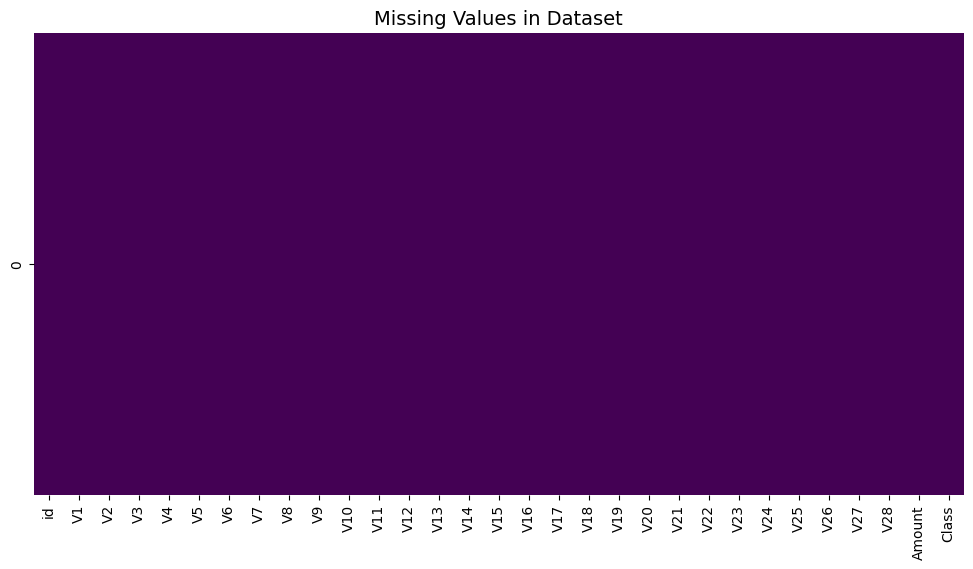

In [ ]:
# Heatmap to visualize missing values using the stored variable
plt.figure(figsize=(12,6))
sns.heatmap(missing_values.to_frame().T, cbar=False, cmap="viridis")
plt.title("Missing Values in Dataset", fontsize=14)
plt.show()


In [ ]:
# Check if there are any duplicated rows in the dataset
data_creditcard.duplicated().any()

False

In [ ]:
# Generate descriptive statistics for numerical columns in the dataset
data_creditcard.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
# Remove 'id' column as it has no predictive value
data_creditcard = data_creditcard.drop('id', axis=1)
data_creditcard

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


**1.3 Exploratary Data Analysis EDA**

In [ ]:
# Display the number of occurrences for each class (0 = normal, 1 = fraudulent)
data_creditcard['Class'].value_counts()

,count
Class,
0,284315
1,284315


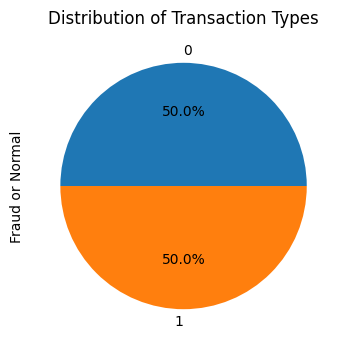

In [ ]:
# Pie chart showing the distribution of normal vs fraudulent transactions
plt.figure(figsize=(4, 4))
data_creditcard['Class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Transaction Types')
plt.ylabel('Fraud or Normal')
plt.show()


In [ ]:
#checking correlation
correlation= data_creditcard.corr()
print(correlation["Class"].sort_values(ascending=False))

Class     1.000000
V4        0.735981
V11       0.724278
V2        0.491878
V19       0.244081
V27       0.214002
V20       0.179851
V8        0.144294
V21       0.109640
V28       0.102024
V26       0.071052
V25       0.061847
V22       0.014098
V23       0.010255
Amount    0.002261
V15      -0.037948
V13      -0.071105
V24      -0.130107
V5       -0.338639
V18      -0.410091
V6       -0.435088
V17      -0.476377
V7       -0.491234
V1       -0.505761
V16      -0.573511
V9       -0.585522
V10      -0.673665
V3       -0.682095
V12      -0.768579
V14      -0.805669
Name: Class, dtype: float64


1.4 Splitting Data

In [ ]:
# Separate features (X) and target variable (y)
X = data_creditcard.drop("Class", axis=1)
y = data_creditcard["Class"]

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y,
    test_size=0.15,      # 15% Test
    stratify=y,
    random_state=42
)


X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=0.1765,    #  15%
    stratify=y_trainval,
    random_state=42
)

In [ ]:
print("Train class distribution:\n", y_train.value_counts())
print("Validation class distribution:\n", y_val.value_counts())
print("Test class distribution:\n", y_test.value_counts())

Train class distribution:
 Class
0    199013
1    199013
Name: count, dtype: int64
Validation class distribution:
 Class
1    42655
0    42654
Name: count, dtype: int64
Test class distribution:
 Class
0    42648
1    42647
Name: count, dtype: int64


1.5 Feature Scaling

In [ ]:

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_val_scaled = pd.DataFrame(
    scaler.transform(X_val),
    columns=X_val.columns,
    index=X_val.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)


In [ ]:
X_train_scaled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
269365,1.704013,-0.575000,0.304984,-0.557933,0.066896,0.322387,0.239231,-0.122306,1.338986,0.580234,...,-0.448435,-0.138909,-0.207523,0.301265,-0.804974,-0.706160,-2.419462,-0.173413,-0.205198,-1.019296
265922,0.303705,-0.331351,0.367781,-1.119422,0.571131,-0.217958,0.733983,-0.168756,0.520819,0.459524,...,-0.536987,-0.094189,-0.008365,0.451618,-0.003741,-3.376986,-0.631440,0.104461,0.720332,1.451992
389599,-0.113259,-0.418929,0.232536,-1.094635,-0.337933,0.780134,1.609772,-0.233700,0.675933,-0.091658,...,-0.046492,-0.050283,0.255544,-0.008126,-0.423814,0.872882,-1.053766,0.032454,-0.235678,-1.192799
308743,-0.153862,0.341401,-0.342724,0.775399,2.418433,-1.231901,1.205704,-0.293582,-0.761236,-0.136974,...,-0.187519,-0.188896,-0.226396,-0.347770,-0.188333,1.507871,0.893883,-0.347774,0.428827,0.508784
126593,-0.445859,-0.890570,2.243333,-1.601773,0.632022,0.752278,0.272337,0.005625,1.480851,-0.002821,...,-0.619077,-0.053508,0.761973,0.811215,-1.107460,0.523508,-1.612572,-0.049686,-0.092552,0.630355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236889,-0.182205,-0.265063,0.927845,-0.719465,0.879140,-0.429440,0.859192,-0.253108,0.359261,0.259503,...,-0.106808,-0.039040,0.538869,-0.457519,-0.017867,1.599559,0.173407,-0.532978,-0.313317,-0.553282
223185,-0.469184,-1.714485,-0.222997,-0.983426,-0.883326,1.245952,3.059792,-0.308926,-0.199364,0.482316,...,0.230977,-0.028159,0.245846,0.945309,0.096336,-1.025970,-0.918919,-0.031790,-1.489154,-1.732327
29676,-0.417311,-1.314693,1.861222,-0.992410,-0.130033,-0.112810,0.550978,-0.135820,1.331273,0.049183,...,1.077120,0.101660,0.539547,0.891095,1.567569,0.593569,0.594559,-0.325175,0.230215,-1.704582
510642,-1.405065,1.412769,-1.478550,1.746262,-1.702833,-1.465859,-1.741317,1.068823,-1.686949,-1.862366,...,-0.105048,0.493922,-0.092337,0.477778,1.183949,-0.655972,-0.807291,-0.953116,-0.123512,-0.732865



## Block 2: Baseline Logistic Regression


In [ ]:
# 2.1 Train the Model (Baseline)
logreg = LogisticRegression(
    penalty='l2',
    solver='saga',
    max_iter=500,
    n_jobs=-1
)
logreg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, n_jobs=-1, solver='saga')

In [ ]:
# 2.2 Probabilities on Val/Test
val_prob = logreg.predict_proba(X_val_scaled)[:, 1]
test_prob = logreg.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# 2.3 Evaluation Metrics Function
def compute_metrics(y_true, y_prob, threshold=0.5):
    y_pred = (y_prob >= threshold).astype(int)# convert probabilities into class labels (0/1) using the threshold
    return {
        "PR_AUC": float(average_precision_score(y_true, y_prob)),# Precision-Recall AUC
        "ROC_AUC": float(roc_auc_score(y_true, y_prob)),# ROC AUC
        "F1": float(f1_score(y_true, y_pred)),# F1 score
        "Precision": float(precision_score(y_true, y_pred, zero_division=0)),
        "Recall": float(recall_score(y_true, y_pred, zero_division=0)),
        "Confusion_Matrix": confusion_matrix(y_true, y_pred)
    }

In [ ]:
# evaluate performance at the default threshold = 0.5
val_metrics_05 = compute_metrics(y_val, val_prob, threshold=0.5)
test_metrics_05 = compute_metrics(y_test, test_prob, threshold=0.5)

print("Validation @0.5:", val_metrics_05)
print("Test @0.5:", test_metrics_05)


Validation @0.5: {'PR_AUC': 0.9950091400218497, 'ROC_AUC': 0.994042401313567, 'F1': 0.9655008383974122, 'Precision': 0.9797267944200415, 'Recall': 0.9516821005743759, 'Confusion_Matrix': array([[41814,   840],
       [ 2061, 40594]])}
Test @0.5: {'PR_AUC': 0.9942666242881945, 'ROC_AUC': 0.9932827651059633, 'F1': 0.963848826693322, 'Precision': 0.9784967020222765, 'Recall': 0.9496330339765986, 'Confusion_Matrix': array([[41758,   890],
       [ 2148, 40499]])}


In [ ]:
# for better display
def print_metrics(name, metrics):
    print(f"=== {name} ===")
    print(f"PR_AUC:     {metrics['PR_AUC']:.4f}")
    print(f"ROC_AUC:    {metrics['ROC_AUC']:.4f}")
    print(f"F1:         {metrics['F1']:.4f}")
    print(f"Precision:  {metrics['Precision']:.4f}")
    print(f"Recall:     {metrics['Recall']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion_Matrix']}")
    print("-" * 40)

print_metrics("Validation @0.5", val_metrics_05)
print_metrics("Test @0.5", test_metrics_05)

=== Validation @0.5 ===
PR_AUC:     0.9950
ROC_AUC:    0.9940
F1:         0.9655
Precision:  0.9797
Recall:     0.9517
Confusion Matrix:
[[41814   840]
 [ 2061 40594]]
----------------------------------------
=== Test @0.5 ===
PR_AUC:     0.9943
ROC_AUC:    0.9933
F1:         0.9638
Precision:  0.9785
Recall:     0.9496
Confusion Matrix:
[[41758   890]
 [ 2148 40499]]
----------------------------------------


In [ ]:
# 2.4 tune the threshold on Validation set to reduce False Negatives
def tune_threshold_by_recall(y_true, y_prob, min_precision=0.3):
    best = {"thr": 0.5, "recall": 0.0, "precision": 0.0, "f1": 0.0}
    for thr in np.linspace(0.05, 0.95, 19):
        y_pred = (y_prob >= thr).astype(int)
        p = precision_score(y_true, y_pred, zero_division=0)
        r = recall_score(y_true, y_pred, zero_division=0)
        f = f1_score(y_true, y_pred, zero_division=0)
        #  prioritize recall while keeping minimum precision
        if p >= min_precision and r > best["recall"]:
            best = {"thr": float(thr), "recall": float(r), "precision": float(p), "f1": float(f)}
    return best

best_thr_info = tune_threshold_by_recall(y_val, val_prob, min_precision=0.3)
best_thr = best_thr_info["thr"]
print("Best threshold (val):", best_thr_info)


Best threshold (val): {'thr': 0.05, 'recall': 0.9942562419411558, 'precision': 0.8087029480187636, 'f1': 0.891931396363713}


In [ ]:
print(f"Best threshold on Validation set:")
print(f"  Threshold : {best_thr_info['thr']:.2f}")
print(f"  Recall    : {best_thr_info['recall']:.4f}")
print(f"  Precision : {best_thr_info['precision']:.4f}")
print(f"  F1-score  : {best_thr_info['f1']:.4f}")


Best threshold on Validation set:
  Threshold : 0.05
  Recall    : 0.9943
  Precision : 0.8087
  F1-score  : 0.8919


In [ ]:
# re-evaluate on Test using the chosen threshold
test_metrics_best = compute_metrics(y_test, test_prob, threshold=best_thr)

print("Test metrics at best threshold:")
print(f"  Threshold : {best_thr:.2f}")
print(f"  PR_AUC    : {test_metrics_best['PR_AUC']:.4f}")
print(f"  ROC_AUC   : {test_metrics_best['ROC_AUC']:.4f}")
print(f"  F1-score  : {test_metrics_best['F1']:.4f}")
print(f"  Precision : {test_metrics_best['Precision']:.4f}")
print(f"  Recall    : {test_metrics_best['Recall']:.4f}")
print(f"  Confusion Matrix:\n{test_metrics_best['Confusion_Matrix']}")


Test metrics at best threshold:
  Threshold : 0.05
  PR_AUC    : 0.9943
  ROC_AUC   : 0.9933
  F1-score  : 0.8925
  Precision : 0.8098
  Recall    : 0.9941
  Confusion Matrix:
[[32692  9956]
 [  253 42394]]


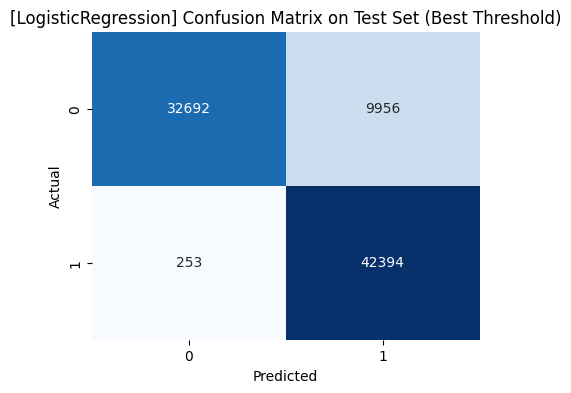

In [ ]:
# Extract the confusion matrix from computed metrics
cm = test_metrics_best['Confusion_Matrix']

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('[LogisticRegression] Confusion Matrix on Test Set (Best Threshold)')
plt.show()

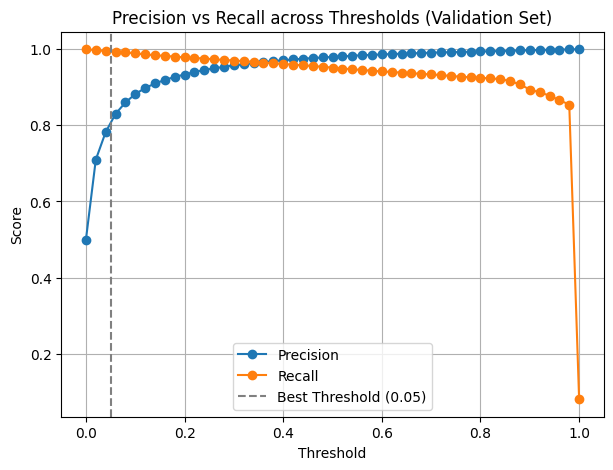

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score


thresholds = np.linspace(0, 1, 51)
precisions = []
recalls = []

for thr in thresholds:
    y_pred = (val_prob >= thr).astype(int)
    p = precision_score(y_val, y_pred, zero_division=0)
    r = recall_score(y_val, y_pred, zero_division=0)
    precisions.append(p)
    recalls.append(r)


plt.figure(figsize=(7,5))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.axvline(x=0.05, color='gray', linestyle='--', label='Best Threshold (0.05)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall across Thresholds (Validation Set)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

metrics_05 = compute_metrics(y_test, test_prob, threshold=0.5)


metrics_best = compute_metrics(y_test, test_prob, threshold=0.05)


def compare_metrics(m1, m2, name1="0.5", name2="0.05"):
    print(f"{'Metric':<15}{name1:^15}{name2:^15}")
    print("-"*45)
    for key in ["PR_AUC","ROC_AUC","F1","Precision","Recall"]:
        print(f"{key:<15}{m1[key]:^15.4f}{m2[key]:^15.4f}")
    print("\nConfusion Matrix:")
    print(f"{name1}: \n{m1['Confusion_Matrix']}")
    print(f"{name2}: \n{m2['Confusion_Matrix']}")


compare_metrics(metrics_05, metrics_best)


Metric               0.5           0.05      
---------------------------------------------
PR_AUC             0.9943         0.9943     
ROC_AUC            0.9933         0.9933     
F1                 0.9638         0.8925     
Precision          0.9785         0.8098     
Recall             0.9496         0.9941     

Confusion Matrix:
0.5: 
[[41758   890]
 [ 2148 40499]]
0.05: 
[[32692  9956]
 [  253 42394]]


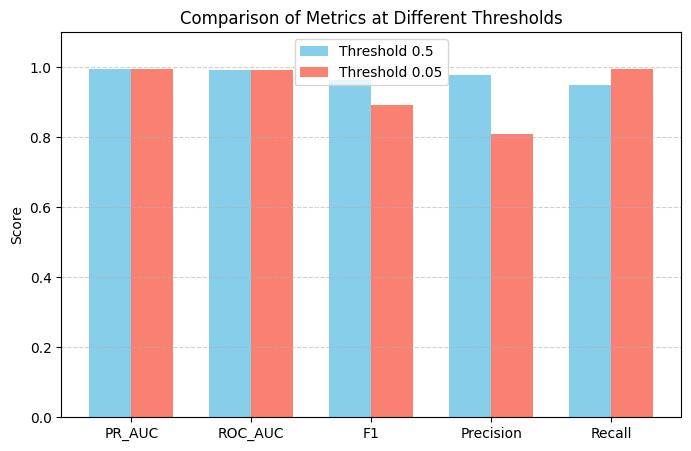

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


metrics_05 = compute_metrics(y_test, test_prob, threshold=0.5)
metrics_best = compute_metrics(y_test, test_prob, threshold=0.05)


metrics_names = ["PR_AUC","ROC_AUC","F1","Precision","Recall"]
values_05 = [metrics_05[m] for m in metrics_names]
values_best = [metrics_best[m] for m in metrics_names]

x = np.arange(len(metrics_names))
width = 0.35


plt.figure(figsize=(8,5))
plt.bar(x - width/2, values_05, width, label='Threshold 0.5', color='skyblue')
plt.bar(x + width/2, values_best, width, label='Threshold 0.05', color='salmon')

plt.xticks(x, metrics_names)
plt.ylabel('Score')
plt.title('Comparison of Metrics at Different Thresholds')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## Block 3: XGBoost (CV + Early Stopping)


In [ ]:
# XGBoost GridSearchCV (5-fold, PR-AUC) then final training with early stopping

# 5-fold CV on TRAIN only
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Parameter Grid
param_grid = {
    "max_depth": [3, 5],
    "learning_rate": [0.1, 0.05],
    "n_estimators": [400, 800],
    "subsample": [0.8],
    "colsample_bytree": [0.8],
}


In [ ]:
# base XGBoost model
xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

In [ ]:
# define GridSearchCV for hyperparameter tuning

grid = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring="average_precision",  # PR-AUC
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

In [ ]:
# fit GridSearchCV only on TRAIN
grid.fit(X_train_scaled, y_train)
print("Best params:", grid.best_params_)
print("Best CV PR-AUC:", grid.best_score_)

# save best parameters for later use
best_params = grid.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 800, 'subsample': 0.8}
Best CV PR-AUC: 0.9999886815566136


In [ ]:
#final training with early stopping on Validation set

xgb_final = XGBClassifier(
    **best_params,
    objective="binary:logistic",
    eval_metric="aucpr",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

xgb_final.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val)],
    early_stopping_rounds=50,
    verbose=False
)

/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
# probabilities and evaluation
val_prob  = xgb_final.predict_proba(X_val_scaled)[:, 1]
test_prob = xgb_final.predict_proba(X_test_scaled)[:, 1]
val_pred  = (val_prob  >= 0.5).astype(int)
test_pred = (test_prob >= 0.5).astype(int)

In [ ]:
def compute_metrics(y_true, y_prob, y_pred):
    return {
        "PR_AUC": float(average_precision_score(y_true, y_prob)),
        "ROC_AUC": float(roc_auc_score(y_true, y_prob)),
        "F1": float(f1_score(y_true, y_pred)),
        "Precision": float(precision_score(y_true, y_pred, zero_division=0)),
        "Recall": float(recall_score(y_true, y_pred, zero_division=0)),
        "Confusion_Matrix": confusion_matrix(y_true, y_pred),
    }

print("\n[XGB] Validation @0.5:", compute_metrics(y_val,  val_prob,  val_pred))
print("[XGB] Test @0.5:",       compute_metrics(y_test, test_prob, test_pred))



[XGB] Validation @0.5: {'PR_AUC': 0.9999883616383545, 'ROC_AUC': 0.9999895325748476, 'F1': 0.9997070369719342, 'Precision': 0.9994142455482662, 'Recall': 1.0, 'Confusion_Matrix': array([[42629,    25],
       [    0, 42655]])}
[XGB] Test @0.5: {'PR_AUC': 0.9999678617693065, 'ROC_AUC': 0.9999743076411968, 'F1': 0.9996952648851383, 'Precision': 0.9993907154406768, 'Recall': 1.0, 'Confusion_Matrix': array([[42622,    26],
       [    0, 42647]])}


In [ ]:
def print_metrics(name, metrics):
    print(f"=== {name} ===")
    print(f"PR_AUC:     {metrics['PR_AUC']:.4f}")
    print(f"ROC_AUC:    {metrics['ROC_AUC']:.4f}")
    print(f"F1:         {metrics['F1']:.4f}")
    print(f"Precision:  {metrics['Precision']:.4f}")
    print(f"Recall:     {metrics['Recall']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion_Matrix']}")
    print("-" * 40)

val_metrics_xgb  = compute_metrics(y_val,  val_prob,  val_pred)
test_metrics_xgb = compute_metrics(y_test, test_prob, test_pred)

print_metrics("[XGB] Validation @0.5", val_metrics_xgb)
print_metrics("[XGB] Test @0.5",       test_metrics_xgb)


=== [XGB] Validation @0.5 ===
PR_AUC:     1.0000
ROC_AUC:    1.0000
F1:         0.9997
Precision:  0.9994
Recall:     1.0000
Confusion Matrix:
[[42629    25]
 [    0 42655]]
----------------------------------------
=== [XGB] Test @0.5 ===
PR_AUC:     1.0000
ROC_AUC:    1.0000
F1:         0.9997
Precision:  0.9994
Recall:     1.0000
Confusion Matrix:
[[42622    26]
 [    0 42647]]
----------------------------------------


In [ ]:
# tune threshold to reduce False Negatives
def tune_threshold_by_recall(y_true, y_prob, min_precision=0.30):
    best = {"thr":0.5,"recall":0.0,"precision":0.0,"f1":0.0}
    for thr in np.linspace(0.05, 0.95, 19):
        yp = (y_prob >= thr).astype(int)
        p = precision_score(y_true, yp, zero_division=0)
        r = recall_score(y_true, yp, zero_division=0)
        f = f1_score(y_true, yp, zero_division=0)
        if p >= min_precision and r > best["recall"]:
            best = {"thr": float(thr), "recall": float(r), "precision": float(p), "f1": float(f)}
    return best

best_thr = tune_threshold_by_recall(y_val, val_prob, min_precision=0.3)["thr"]
print("[XGB] Best thr (Val):", best_thr)
print("[XGB] Test @best_thr:", compute_metrics(y_test, test_prob, (test_prob>=best_thr).astype(int)))


[XGB] Best thr (Val): 0.05
[XGB] Test @best_thr: {'PR_AUC': 0.9999678617693065, 'ROC_AUC': 0.9999743076411968, 'F1': 0.9974389858851871, 'Precision': 0.9948910558484579, 'Recall': 1.0, 'Confusion_Matrix': array([[42429,   219],
       [    0, 42647]])}


In [ ]:
# pretty-print best threshold info and test metrics
best_info = tune_threshold_by_recall(y_val, val_prob, min_precision=0.3)
best_thr = best_info["thr"]
test_metrics_best = compute_metrics(y_test, test_prob, (test_prob >= best_thr).astype(int))

# helper to print a clean block
def print_metrics_block(title, thr, m):
    print(f"=== {title} ===")
    print(f"Threshold : {thr:.2f}")
    print(f"PR_AUC    : {m['PR_AUC']:.6f}")
    print(f"ROC_AUC   : {m['ROC_AUC']:.6f}")
    print(f"F1        : {m['F1']:.4f}")
    print(f"Precision : {m['Precision']:.4f}")
    print(f"Recall    : {m['Recall']:.4f}")
    tn, fp = m["Confusion_Matrix"][0]
    fn, tp = m["Confusion_Matrix"][1]
    print("Confusion Matrix:")
    print(f"  [[TN={tn:6d}, FP={fp:6d}],")
    print(f"   [FN={fn:6d}, TP={tp:6d}]]")
    print("-" * 42)

# header line summarizing the chosen threshold on Validation
print(f"[XGB] Best thr (Val): {best_thr:.2f} | Recall={best_info['recall']:.4f} | Precision={best_info['precision']:.4f} | F1={best_info['f1']:.4f}")

# neatly formatted Test block
print_metrics_block("[XGB] Test @best_thr", best_thr, test_metrics_best)


[XGB] Best thr (Val): 0.05 | Recall=1.0000 | Precision=0.9955 | F1=0.9978
=== [XGB] Test @best_thr ===
Threshold : 0.05
PR_AUC    : 0.999968
ROC_AUC   : 0.999974
F1        : 0.9974
Precision : 0.9949
Recall    : 1.0000
Confusion Matrix:
  [[TN= 42429, FP=   219],
   [FN=     0, TP= 42647]]
------------------------------------------


In [ ]:

metrics_05 = compute_metrics(
    y_test,
    test_prob,
    (test_prob >= 0.5).astype(int)
)

metrics_best = compute_metrics(
    y_test,
    test_prob,
    (test_prob >= 0.05).astype(int)
)


compare_metrics(metrics_05, metrics_best)



Metric               0.5           0.05      
---------------------------------------------
PR_AUC             1.0000         1.0000     
ROC_AUC            1.0000         1.0000     
F1                 0.9997         0.9974     
Precision          0.9994         0.9949     
Recall             1.0000         1.0000     

Confusion Matrix:
0.5: 
[[42622    26]
 [    0 42647]]
0.05: 
[[42429   219]
 [    0 42647]]


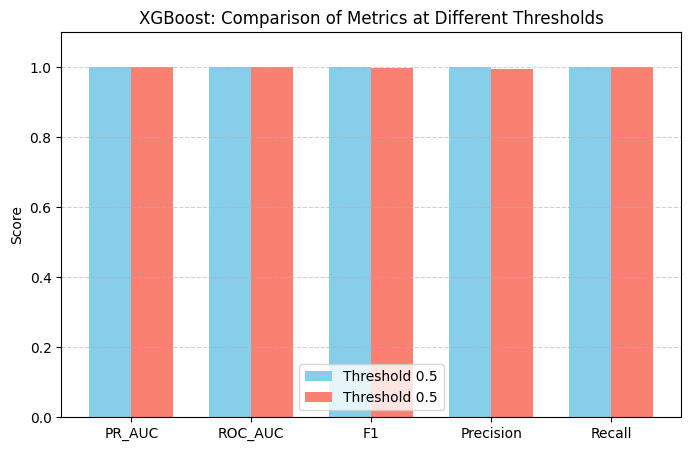

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metrics_names = ["PR_AUC","ROC_AUC","F1","Precision","Recall"]

# استخراج القيم من الدكت
values_05 = [metrics_05[m] for m in metrics_names]
values_best = [metrics_best[m] for m in metrics_names]

x = np.arange(len(metrics_names))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, values_05, width, label='Threshold 0.5', color='skyblue')
plt.bar(x + width/2, values_best, width, label='Threshold 0.5', color='salmon')

plt.xticks(x, metrics_names)
plt.ylabel('Score')
plt.title('XGBoost: Comparison of Metrics at Different Thresholds')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


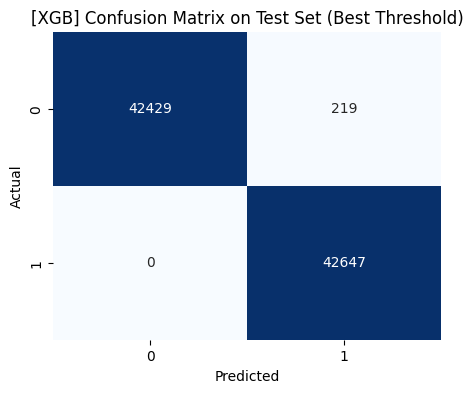

In [ ]:
cm = test_metrics_best['Confusion_Matrix']

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('[XGB] Confusion Matrix on Test Set (Best Threshold)')
plt.show()

In [ ]:
!pip install gradio
!python app.py

python3: can't open file '/content/app.py': [Errno 2] No such file or directory


In [ ]:
# ---- Gradio Demo: Fraud Prediction (XGBoost) ----
import numpy as np
import pandas as pd
import gradio as gr

# ===== Safety checks =====
_required = ["xgb_final", "scaler", "X_test"]
for _name in _required:
    if _name not in globals():
        raise RuntimeError(f"Missing `{_name}` in memory. Run training cells first.")

# Feature names: if you already have a list, use it; else infer from X_test
try:
    feature_names  # noqa
except NameError:
    feature_names = list(X_test.columns)

N_FEATS = len(feature_names)

# Choose the operating threshold you actually used
# If you have best_thr from validation, set THRESHOLD = best_thr
THRESHOLD = float(globals().get("best_thr", 0.75))  # fallback to 0.75 if not set

# Base empty row for manual entry
empty_row = pd.DataFrame([[0.0]*N_FEATS], columns=feature_names)

def autofill_from_test(idx: int):
    """Return a single unscaled row from X_test by index for preview/edit."""
    # clamp index to [0, len-1]
    if len(X_test) == 0:
        return empty_row.copy()
    idx = int(max(0, min(idx, len(X_test)-1)))
    row = X_test.iloc[[idx]].copy()
    # Ensure correct column order
    row = row[feature_names]
    return row.reset_index(drop=True)

def predict_row(df_one_row: pd.DataFrame, thr: float):
    """Scale -> predict -> return probability & label, plus the used row preview."""
    # Validate shape
    if df_one_row is None or not isinstance(df_one_row, (pd.DataFrame,)):
        return 0.0, "Invalid input", empty_row.copy()

    # Keep only expected columns, fill missing with 0
    df = df_one_row.reindex(columns=feature_names, fill_value=0.0)
    # Coerce to numeric
    df = df.apply(pd.to_numeric, errors="coerce").fillna(0.0)

    # Scale exactly like training
    # scaler was fitted on TRAIN; here we transform a single row
    X_scaled = scaler.transform(df.values)

    # Predict proba with XGBoost
    prob = float(xgb_final.predict_proba(X_scaled)[:, 1][0])
    label = "FRAUD" if prob >= float(thr) else "LEGIT"

    # Return probability, decision, and a clean preview of the used row
    return round(prob, 6), label, df.reset_index(drop=True)

with gr.Blocks(title="Fraud Detection Prototype") as demo:
    gr.Markdown("## Fraud Detection Prototype\nEnter or auto-fill a transaction, then **Predict**.")

    with gr.Row():
        with gr.Column(scale=3):
            with gr.Group():
                gr.Markdown("**Input Row**")
                df_input = gr.Dataframe(
                    value=empty_row.copy(),
                    headers=feature_names,
                    row_count=1,
                    col_count=N_FEATS,
                    label="Edit values (V1–V28, Amount)",
                    datatype="number",   # safe on most Gradio versions; remove if yours complains
                    interactive=True
                )

            with gr.Group():
                gr.Markdown("**Auto-Fill from X_test**")
                idx_slider = gr.Slider(
                    minimum=0, maximum=max(0, len(X_test)-1), step=1, value=0,
                    label="Row index in X_test"
                )
                btn_fill = gr.Button("Auto-Fill")
                preview1 = gr.Dataframe(
                    label="Preview (X_test[idx])",
                    interactive=False,
                    wrap=True,
                )

        with gr.Column(scale=2):
            with gr.Group():
                gr.Markdown("**Prediction**")
                thr_box = gr.Number(value=THRESHOLD, precision=4, label="Operating Threshold (t*)")
                prob_out = gr.Number(value=0.0, precision=6, label="Fraud Probability")
                label_out = gr.Textbox(label="Decision", interactive=False)

                btn_predict = gr.Button("Predict", variant="primary")

            with gr.Group():
                used_row = gr.Dataframe(
                    label="Row used for prediction (after any edits)",
                    interactive=False,
                    wrap=True,
                )

    # Wire events
    btn_fill.click(
        fn=autofill_from_test,
        inputs=[idx_slider],
        outputs=[preview1],
    ).then(
        fn=lambda df: df,  # push the same row into the editable input
        inputs=[preview1],
        outputs=[df_input]
    )

    btn_predict.click(
        fn=predict_row,
        inputs=[df_input, thr_box],
        outputs=[prob_out, label_out, used_row],
    )

# Launch
demo.launch(share=True)



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e96352e76fd3802f06.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
